In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Exploration and cleaning (If needed) 

In [2]:
df_train = pd.read_csv('train_BRCpofr.csv')
df_test = pd.read_csv('test_koRSKBP.csv')

In [3]:
df_train.head()

id  gender   area qualification         income  marital_status  vintage  \
0   1    Male  Urban      Bachelor         5L-10L               1        5   
1   2    Male  Rural   High School         5L-10L               0        8   
2   3    Male  Urban      Bachelor         5L-10L               1        8   
3   4  Female  Rural   High School         5L-10L               0        7   
4   5    Male  Urban   High School  More than 10L               1        6   

   claim_amount num_policies policy type_of_policy    cltv  
0          5790  More than 1      A       Platinum   64308  
1          5080  More than 1      A       Platinum  515400  
2          2599  More than 1      A       Platinum   64212  
3             0  More than 1      A       Platinum   97920  
4          3508  More than 1      A           Gold   59736

In [4]:
df_train.shape

(89392, 12)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [6]:
df_train.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

In [7]:
df_train.duplicated().sum()

0

In [8]:
df_train.describe()

id  marital_status       vintage  claim_amount           cltv
count  89392.000000    89392.000000  89392.000000  89392.000000   89392.000000
mean   44696.500000        0.575488      4.595669   4351.502416   97952.828978
std    25805.391969        0.494272      2.290446   3262.359775   90613.814793
min        1.000000        0.000000      0.000000      0.000000   24828.000000
25%    22348.750000        0.000000      3.000000   2406.000000   52836.000000
50%    44696.500000        1.000000      5.000000   4089.000000   66396.000000
75%    67044.250000        1.000000      6.000000   6094.000000  103440.000000
max    89392.000000        1.000000      8.000000  31894.000000  724068.000000

In [9]:
df_test.head()

id  gender   area qualification         income  marital_status  vintage  \
0  89393  Female  Rural   High School         5L-10L               0        6   
1  89394  Female  Urban   High School          2L-5L               0        4   
2  89395    Male  Rural   High School         5L-10L               1        7   
3  89396  Female  Rural      Bachelor  More than 10L               1        2   
4  89397  Female  Urban   High School          2L-5L               0        5   

   claim_amount num_policies policy type_of_policy  
0          2134  More than 1      B         Silver  
1          4102  More than 1      A       Platinum  
2          2925  More than 1      B           Gold  
3             0  More than 1      B         Silver  
4         14059  More than 1      B         Silver

In [10]:
df_test.shape

(59595, 11)

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59595 entries, 0 to 59594
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              59595 non-null  int64 
 1   gender          59595 non-null  object
 2   area            59595 non-null  object
 3   qualification   59595 non-null  object
 4   income          59595 non-null  object
 5   marital_status  59595 non-null  int64 
 6   vintage         59595 non-null  int64 
 7   claim_amount    59595 non-null  int64 
 8   num_policies    59595 non-null  object
 9   policy          59595 non-null  object
 10  type_of_policy  59595 non-null  object
dtypes: int64(4), object(7)
memory usage: 5.0+ MB


In [12]:
df_test.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
dtype: int64

In [13]:
df_test.duplicated().sum()

0

In [14]:
df = df_train.append(df_test)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13476\925505788.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_train.append(df_test)


In [15]:
df

id  gender   area qualification         income  marital_status  \
0           1    Male  Urban      Bachelor         5L-10L               1   
1           2    Male  Rural   High School         5L-10L               0   
2           3    Male  Urban      Bachelor         5L-10L               1   
3           4  Female  Rural   High School         5L-10L               0   
4           5    Male  Urban   High School  More than 10L               1   
...       ...     ...    ...           ...            ...             ...   
59590  148983    Male  Rural      Bachelor         5L-10L               1   
59591  148984    Male  Urban   High School         5L-10L               0   
59592  148985  Female  Urban   High School          2L-5L               1   
59593  148986    Male  Rural      Bachelor         5L-10L               0   
59594  148987  Female  Urban      Bachelor         5L-10L               1   

       vintage  claim_amount num_policies policy type_of_policy      cltv  
0            5          5790  More than 1      A       Platinum   64308.0  
1            8          5080  More than 1      A       Platinum  515400.0  
2            8          2599  More than 1      A       Platinum   64212.0  
3            7             0  More than 1      A       Platinum   97920.0  
4            6          3508  More than 1      A           Gold   59736.0  
...        ...           ...          ...    ...            ...       ...  
59590        6             0            1      A         Silver       NaN  
59591        6             0            1      C           Gold       NaN  
59592        4          3323  More than 1      B       Platinum       NaN  
59593        1          2886  More than 1      A         Silver       NaN  
59594        4          5939  More than 1      B       Platinum       NaN  

[148987 rows x 12 columns]

## Exploratory Data analysis 

In [16]:
#check for outliers on claim amount column
#create a box plot
import plotly.express as px
fig = px.box(df_train, y="claim_amount")
fig.show()

<AxesSubplot:>

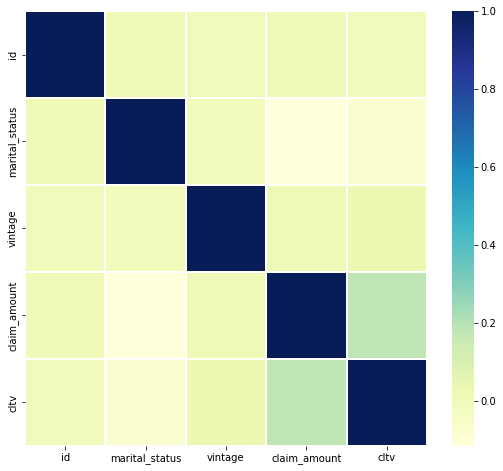

In [17]:
# Finding correlation
corrmat = df_train.corr()
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

## Feature Engineering and Selection

In [18]:
df

id  gender   area qualification         income  marital_status  \
0           1    Male  Urban      Bachelor         5L-10L               1   
1           2    Male  Rural   High School         5L-10L               0   
2           3    Male  Urban      Bachelor         5L-10L               1   
3           4  Female  Rural   High School         5L-10L               0   
4           5    Male  Urban   High School  More than 10L               1   
...       ...     ...    ...           ...            ...             ...   
59590  148983    Male  Rural      Bachelor         5L-10L               1   
59591  148984    Male  Urban   High School         5L-10L               0   
59592  148985  Female  Urban   High School          2L-5L               1   
59593  148986    Male  Rural      Bachelor         5L-10L               0   
59594  148987  Female  Urban      Bachelor         5L-10L               1   

       vintage  claim_amount num_policies policy type_of_policy      cltv  
0            5          5790  More than 1      A       Platinum   64308.0  
1            8          5080  More than 1      A       Platinum  515400.0  
2            8          2599  More than 1      A       Platinum   64212.0  
3            7             0  More than 1      A       Platinum   97920.0  
4            6          3508  More than 1      A           Gold   59736.0  
...        ...           ...          ...    ...            ...       ...  
59590        6             0            1      A         Silver       NaN  
59591        6             0            1      C           Gold       NaN  
59592        4          3323  More than 1      B       Platinum       NaN  
59593        1          2886  More than 1      A         Silver       NaN  
59594        4          5939  More than 1      B       Platinum       NaN  

[148987 rows x 12 columns]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148987 entries, 0 to 59594
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              148987 non-null  int64  
 1   gender          148987 non-null  object 
 2   area            148987 non-null  object 
 3   qualification   148987 non-null  object 
 4   income          148987 non-null  object 
 5   marital_status  148987 non-null  int64  
 6   vintage         148987 non-null  int64  
 7   claim_amount    148987 non-null  int64  
 8   num_policies    148987 non-null  object 
 9   policy          148987 non-null  object 
 10  type_of_policy  148987 non-null  object 
 11  cltv            89392 non-null   float64
dtypes: float64(1), int64(4), object(7)
memory usage: 14.8+ MB


In [20]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [21]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['gender']= label_encoder.fit_transform(df['gender'])
  
df['gender'].unique() 

array([1, 0])

In [22]:
 df['area'].unique()

array(['Urban', 'Rural'], dtype=object)

In [23]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['area']= label_encoder.fit_transform(df['area'])
  
df['area'].unique() 

array([1, 0])

In [24]:
df['qualification'].unique()

array(['Bachelor', 'High School', 'Others'], dtype=object)

In [25]:
df1 = pd.get_dummies(df['qualification'])

In [26]:
df1

Bachelor  High School  Others
0             1            0       0
1             0            1       0
2             1            0       0
3             0            1       0
4             0            1       0
...         ...          ...     ...
59590         1            0       0
59591         0            1       0
59592         0            1       0
59593         1            0       0
59594         1            0       0

[148987 rows x 3 columns]

In [27]:
df['income'].unique()

array(['5L-10L', 'More than 10L', '2L-5L', '<=2L'], dtype=object)

In [28]:
def income_bins(cat):
    if cat == '<=2L':
        return "Very low"
    elif cat == '2L-5L':
        return "low"
    elif cat == '5L-10L':
        return "High"
    else :
        return "Very high"

In [29]:
df['income']=df['income'].apply(income_bins)

In [30]:
df

id  gender  area qualification     income  marital_status  vintage  \
0           1       1     1      Bachelor       High               1        5   
1           2       1     0   High School       High               0        8   
2           3       1     1      Bachelor       High               1        8   
3           4       0     0   High School       High               0        7   
4           5       1     1   High School  Very high               1        6   
...       ...     ...   ...           ...        ...             ...      ...   
59590  148983       1     0      Bachelor       High               1        6   
59591  148984       1     1   High School       High               0        6   
59592  148985       0     1   High School        low               1        4   
59593  148986       1     0      Bachelor       High               0        1   
59594  148987       0     1      Bachelor       High               1        4   

       claim_amount num_policies policy type_of_policy      cltv  
0              5790  More than 1      A       Platinum   64308.0  
1              5080  More than 1      A       Platinum  515400.0  
2              2599  More than 1      A       Platinum   64212.0  
3                 0  More than 1      A       Platinum   97920.0  
4              3508  More than 1      A           Gold   59736.0  
...             ...          ...    ...            ...       ...  
59590             0            1      A         Silver       NaN  
59591             0            1      C           Gold       NaN  
59592          3323  More than 1      B       Platinum       NaN  
59593          2886  More than 1      A         Silver       NaN  
59594          5939  More than 1      B       Platinum       NaN  

[148987 rows x 12 columns]

In [31]:
df['income'].unique()

array(['High', 'Very high', 'low', 'Very low'], dtype=object)

In [32]:
df2 = pd.get_dummies(df['income'])

In [33]:
df2

High  Very high  Very low  low
0         1          0         0    0
1         1          0         0    0
2         1          0         0    0
3         1          0         0    0
4         0          1         0    0
...     ...        ...       ...  ...
59590     1          0         0    0
59591     1          0         0    0
59592     0          0         0    1
59593     1          0         0    0
59594     1          0         0    0

[148987 rows x 4 columns]

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148987 entries, 0 to 59594
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              148987 non-null  int64  
 1   gender          148987 non-null  int32  
 2   area            148987 non-null  int32  
 3   qualification   148987 non-null  object 
 4   income          148987 non-null  object 
 5   marital_status  148987 non-null  int64  
 6   vintage         148987 non-null  int64  
 7   claim_amount    148987 non-null  int64  
 8   num_policies    148987 non-null  object 
 9   policy          148987 non-null  object 
 10  type_of_policy  148987 non-null  object 
 11  cltv            89392 non-null   float64
dtypes: float64(1), int32(2), int64(4), object(5)
memory usage: 13.6+ MB


In [35]:
df['num_policies'].unique()

array(['More than 1', '1'], dtype=object)

In [36]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['num_policies']= label_encoder.fit_transform(df['num_policies'])
  
df['num_policies'].unique() 

array([1, 0])

In [37]:
df['policy'].unique()

array(['A', 'C', 'B'], dtype=object)

In [38]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['policy']= label_encoder.fit_transform(df['policy'])
  
df['policy'].unique() 

array([0, 2, 1])

In [39]:
df['type_of_policy'].unique()

array(['Platinum', 'Gold', 'Silver'], dtype=object)

In [40]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['type_of_policy']= label_encoder.fit_transform(df['type_of_policy'])
  
df['type_of_policy'].unique() 

array([1, 0, 2])

In [41]:
df

id  gender  area qualification     income  marital_status  vintage  \
0           1       1     1      Bachelor       High               1        5   
1           2       1     0   High School       High               0        8   
2           3       1     1      Bachelor       High               1        8   
3           4       0     0   High School       High               0        7   
4           5       1     1   High School  Very high               1        6   
...       ...     ...   ...           ...        ...             ...      ...   
59590  148983       1     0      Bachelor       High               1        6   
59591  148984       1     1   High School       High               0        6   
59592  148985       0     1   High School        low               1        4   
59593  148986       1     0      Bachelor       High               0        1   
59594  148987       0     1      Bachelor       High               1        4   

       claim_amount  num_policies  policy  type_of_policy      cltv  
0              5790             1       0               1   64308.0  
1              5080             1       0               1  515400.0  
2              2599             1       0               1   64212.0  
3                 0             1       0               1   97920.0  
4              3508             1       0               0   59736.0  
...             ...           ...     ...             ...       ...  
59590             0             0       0               2       NaN  
59591             0             0       2               0       NaN  
59592          3323             1       1               1       NaN  
59593          2886             1       0               2       NaN  
59594          5939             1       1               1       NaN  

[148987 rows x 12 columns]

In [42]:
df = pd.concat([df, df1], axis=1)


In [43]:
df

id  gender  area qualification     income  marital_status  vintage  \
0           1       1     1      Bachelor       High               1        5   
1           2       1     0   High School       High               0        8   
2           3       1     1      Bachelor       High               1        8   
3           4       0     0   High School       High               0        7   
4           5       1     1   High School  Very high               1        6   
...       ...     ...   ...           ...        ...             ...      ...   
59590  148983       1     0      Bachelor       High               1        6   
59591  148984       1     1   High School       High               0        6   
59592  148985       0     1   High School        low               1        4   
59593  148986       1     0      Bachelor       High               0        1   
59594  148987       0     1      Bachelor       High               1        4   

       claim_amount  num_policies  policy  type_of_policy      cltv  Bachelor  \
0              5790             1       0               1   64308.0         1   
1              5080             1       0               1  515400.0         0   
2              2599             1       0               1   64212.0         1   
3                 0             1       0               1   97920.0         0   
4              3508             1       0               0   59736.0         0   
...             ...           ...     ...             ...       ...       ...   
59590             0             0       0               2       NaN         1   
59591             0             0       2               0       NaN         0   
59592          3323             1       1               1       NaN         0   
59593          2886             1       0               2       NaN         1   
59594          5939             1       1               1       NaN         1   

       High School  Others  
0                0       0  
1                1       0  
2                0       0  
3                1       0  
4                1       0  
...            ...     ...  
59590            0       0  
59591            1       0  
59592            1       0  
59593            0       0  
59594            0       0  

[148987 rows x 15 columns]

In [44]:
df.isnull().sum()

id                    0
gender                0
area                  0
qualification         0
income                0
marital_status        0
vintage               0
claim_amount          0
num_policies          0
policy                0
type_of_policy        0
cltv              59595
Bachelor              0
High School           0
Others                0
dtype: int64

In [45]:
df = pd.concat([df, df2], axis=1)

In [46]:
df

id  gender  area qualification     income  marital_status  vintage  \
0           1       1     1      Bachelor       High               1        5   
1           2       1     0   High School       High               0        8   
2           3       1     1      Bachelor       High               1        8   
3           4       0     0   High School       High               0        7   
4           5       1     1   High School  Very high               1        6   
...       ...     ...   ...           ...        ...             ...      ...   
59590  148983       1     0      Bachelor       High               1        6   
59591  148984       1     1   High School       High               0        6   
59592  148985       0     1   High School        low               1        4   
59593  148986       1     0      Bachelor       High               0        1   
59594  148987       0     1      Bachelor       High               1        4   

       claim_amount  num_policies  policy  type_of_policy      cltv  Bachelor  \
0              5790             1       0               1   64308.0         1   
1              5080             1       0               1  515400.0         0   
2              2599             1       0               1   64212.0         1   
3                 0             1       0               1   97920.0         0   
4              3508             1       0               0   59736.0         0   
...             ...           ...     ...             ...       ...       ...   
59590             0             0       0               2       NaN         1   
59591             0             0       2               0       NaN         0   
59592          3323             1       1               1       NaN         0   
59593          2886             1       0               2       NaN         1   
59594          5939             1       1               1       NaN         1   

       High School  Others  High  Very high  Very low  low  
0                0       0     1          0         0    0  
1                1       0     1          0         0    0  
2                0       0     1          0         0    0  
3                1       0     1          0         0    0  
4                1       0     0          1         0    0  
...            ...     ...   ...        ...       ...  ...  
59590            0       0     1          0         0    0  
59591            1       0     1          0         0    0  
59592            1       0     0          0         0    1  
59593            0       0     1          0         0    0  
59594            0       0     1          0         0    0  

[148987 rows x 19 columns]

In [47]:
df.drop(columns=['qualification','income'],inplace=True)

In [48]:
df

id  gender  area  marital_status  vintage  claim_amount  \
0           1       1     1               1        5          5790   
1           2       1     0               0        8          5080   
2           3       1     1               1        8          2599   
3           4       0     0               0        7             0   
4           5       1     1               1        6          3508   
...       ...     ...   ...             ...      ...           ...   
59590  148983       1     0               1        6             0   
59591  148984       1     1               0        6             0   
59592  148985       0     1               1        4          3323   
59593  148986       1     0               0        1          2886   
59594  148987       0     1               1        4          5939   

       num_policies  policy  type_of_policy      cltv  Bachelor  High School  \
0                 1       0               1   64308.0         1            0   
1                 1       0               1  515400.0         0            1   
2                 1       0               1   64212.0         1            0   
3                 1       0               1   97920.0         0            1   
4                 1       0               0   59736.0         0            1   
...             ...     ...             ...       ...       ...          ...   
59590             0       0               2       NaN         1            0   
59591             0       2               0       NaN         0            1   
59592             1       1               1       NaN         0            1   
59593             1       0               2       NaN         1            0   
59594             1       1               1       NaN         1            0   

       Others  High  Very high  Very low  low  
0           0     1          0         0    0  
1           0     1          0         0    0  
2           0     1          0         0    0  
3           0     1          0         0    0  
4           0     0          1         0    0  
...       ...   ...        ...       ...  ...  
59590       0     1          0         0    0  
59591       0     1          0         0    0  
59592       0     0          0         0    1  
59593       0     1          0         0    0  
59594       0     1          0         0    0  

[148987 rows x 17 columns]

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148987 entries, 0 to 59594
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              148987 non-null  int64  
 1   gender          148987 non-null  int32  
 2   area            148987 non-null  int32  
 3   marital_status  148987 non-null  int64  
 4   vintage         148987 non-null  int64  
 5   claim_amount    148987 non-null  int64  
 6   num_policies    148987 non-null  int32  
 7   policy          148987 non-null  int32  
 8   type_of_policy  148987 non-null  int32  
 9   cltv            89392 non-null   float64
 10  Bachelor        148987 non-null  uint8  
 11  High School     148987 non-null  uint8  
 12  Others          148987 non-null  uint8  
 13  High            148987 non-null  uint8  
 14  Very high       148987 non-null  uint8  
 15  Very low        148987 non-null  uint8  
 16  low             148987 non-null  uint8  
dtypes: float64(

In [50]:
df['Bachelor'] = df['Bachelor'].astype(int)
df['High School'] = df['High School'].astype(int)
df['Others'] = df['Others'].astype(int)
df['High'] = df['High'].astype(int)
df['Very high'] = df['Very high'].astype(int)
df['Very low'] = df['Very low'].astype(int)
df['low'] = df['low'].astype(int)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148987 entries, 0 to 59594
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              148987 non-null  int64  
 1   gender          148987 non-null  int32  
 2   area            148987 non-null  int32  
 3   marital_status  148987 non-null  int64  
 4   vintage         148987 non-null  int64  
 5   claim_amount    148987 non-null  int64  
 6   num_policies    148987 non-null  int32  
 7   policy          148987 non-null  int32  
 8   type_of_policy  148987 non-null  int32  
 9   cltv            89392 non-null   float64
 10  Bachelor        148987 non-null  int32  
 11  High School     148987 non-null  int32  
 12  Others          148987 non-null  int32  
 13  High            148987 non-null  int32  
 14  Very high       148987 non-null  int32  
 15  Very low        148987 non-null  int32  
 16  low             148987 non-null  int32  
dtypes: float64(

In [52]:
# feature scaling
df_test=df[df['cltv'].isnull()]

In [53]:
df_train=df[~df['cltv'].isnull()]

In [54]:
X=df_train.drop('cltv',axis=1)

In [55]:
X=df_train.drop('id',axis=1)

In [56]:
X.head()

gender  area  marital_status  vintage  claim_amount  num_policies  policy  \
0       1     1               1        5          5790             1       0   
1       1     0               0        8          5080             1       0   
2       1     1               1        8          2599             1       0   
3       0     0               0        7             0             1       0   
4       1     1               1        6          3508             1       0   

   type_of_policy      cltv  Bachelor  High School  Others  High  Very high  \
0               1   64308.0         1            0       0     1          0   
1               1  515400.0         0            1       0     1          0   
2               1   64212.0         1            0       0     1          0   
3               1   97920.0         0            1       0     1          0   
4               0   59736.0         0            1       0     0          1   

   Very low  low  
0         0    0  
1         0    0  
2         0    0  
3         0    0  
4         0    0

In [57]:
y=df_train['cltv']

In [58]:
y

0         64308.0
1        515400.0
2         64212.0
3         97920.0
4         59736.0
           ...   
89387     95736.0
89388     67596.0
89389    114120.0
89390     71772.0
89391    108144.0
Name: cltv, Length: 89392, dtype: float64

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=42)

In [60]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [61]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


In [62]:
y_pred

array([106116.,  30852.,  43152., ...,  33816.,  33516.,  90276.])

In [63]:
print(model.coef_)
print(model.intercept_)

[ 4.19441585e-11  1.03000275e-10  1.20578243e-11 -4.65013864e-11
 -2.15019970e-11 -1.86060094e-11 -4.39374874e-12  1.27272685e-11
  9.08994300e+04  2.40296574e+03  2.41864420e+03  9.75244675e+02
 -5.00239588e+02 -3.65802184e+02 -1.44374630e+02 -4.32297569e+02]
98194.84334316838


In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

mae = mean_absolute_error(y_test,y_pred)
print("Mean Absolute error : ",mae)

mse = mean_squared_error(y_test,y_pred)
print("Mean squared error : ",mse)

#rmse = sqrt(mse)
#print("Root mean squared error : ",rmse)

r2 = r2_score(y_test,y_pred)
print("R-squared:", r2)

Mean Absolute error :  1.937783787300892e-10
Mean squared error :  6.414804739487985e-20
R-squared: 1.0


In [68]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

Mean score: 1.0
Standard deviation: 0.0


In [69]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate the accuracy of the model on the training and test data
train_accuracy = r2_score(y_train, y_pred_train)
test_accuracy = r2_score(y_test, y_pred_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 1.0
Test Accuracy: 1.0
